# Практическая работа №1: Основы анализа и моделирования социальных сетей
Выполнил студент гр. 0381 Ефимов Никита. Вариант №3

## Цель работы
Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.

## Основные теоретические положения

Социоматрица - матрица X размерности gxg, описывающая смежные узлы в сети:X = {$x_{ij}$}; i, j = 1, ..., g, где g - количество акторов.

Алгоритм Камада-Кавай (T. Kamada-S. Kawai)) относится к семейству силовых алгоритмов (forced-directed) укладки графов на плоскости, в котором используется пружинная физическая модель, где вершины определяются как тела системы, а ребра как пружины. Силы могут действовать только на вершины, вес пружин при этом не учитывается. В R используется как layout = layout_with_kk (передается в аргумент к plot())

Алгоритм Фрюхтермана-Рейнгольда (Fruchterman T. M. J.-Reingold E. M.)) относится к семейству силовых алгоритмов (forced-directed) укладки графов на плоскости, в котором используется пружинная физическая модель, где вершины определяются как тела системы, а ребра как пружины. Силы могут действовать только на вершины, вес пружин при этом не учитывается. В R используется как layout = layout.fruchterman.reingold (передается в аргумент к plot())

Пятичисленная сводка:<br>
-Размер: кол-во акторов в сети<br>
-Плотность:<br>
    a) Неориентированный случай: $\delta = L/C_g^2$<br>
    b) Ориентированный случай: $\delta = L/A_g^2$<br>
-Компонента: подгруппа, в которой все акторы связаны с друг другом прямо или косвенно.<br>
-Диаметр полной сети: наибольшая длина любого из кратчайших путей между всеми парами узлов<br>
-Коэффициент кластеризации: $C = (number of closedtriplets)/(all triplets)$<br>
Средня степень узлов - $d_{mean} = 1/g\sum_{i = 1}^g(d(n_i))$<br>

Дисперсия - $S_D^2 = 1/g\sum_{i=1}^g(d(n_i)-d_{mean})$<br>

Центральность - мера, характеризующая актор с большим количеством связей (прямых или косвенных).
Индекс центральности вычисляется по формуле: $C_A = \sum_{i = 1}^g[C_a(n^k)-C_A(n_i)]/max\sum_{i=1}^g[C_a(n^k)-C_A(n_i)]$, $C_A(n^k) = max_iC_A(n_i)$.<br><br>
Меры центральности(нормированные, именно такие нужны в данной практической работе):<br>
-Центральность по степени: $C_D^\prime(n_i) = d(n_i)/g-1$<br>
-Центральность по близости: $C_C^\prime(n_i) = g-1/\sum_{j = 1}^g(d(n_i, n_j)) = (g-1)C_C(n_i)$<br>
-Центральность по посредничеству: $C_B^\prime(n_i) = \sum_{j<k}geo_{jk}(n_i)/geo_{jk}/C_{g-1}^2$<br>
-Центральность по информации: $C_I^\prime(n_i) = C_I(n_i)/\sum_iC_I(n_i)$, где $C_I(n_i) = 1/c_{ii}+(T-2R)/g$

Централизация:<br>
-по степени: $C_D = \sum_{i = 1}^g[C_D(n^k)-C_D(n_i)]/(g-1)(g-2)$<br>
-по близости: $C_С = \sum_{i = 1}^g[C_С^\prime(n^k)-C_C^\prime(n_i)]/(g-1)(g-2)/(2g-3)$<br>
-по посредничеству: $C_B = \sum_{i = 1}^g[C_B^\prime(n^k)-C_B^\prime(n_i)]/g-1$<br>
-по информации = дисперсии индекса информации актора: $S_I^2 = 1/g\sum_{i = 1}^g[C_I^\prime(n_i) - \sum_iC_I(n_i)]$<br>
Точки сочленения - узлы, удаление которых увеличит число компонент связности<br> 

Мосты - ребра, удаление которых разделит одну компоненту связности на две.<br>

Престиж - мера, характеризующая актор с большим количеством входных связей.<br>
Меры престижа(интересуют нормализованные случаи):<br>
-Престиж по степени: $P_D^\prime(n_i) = d_I(n_i)/g-1, d_I(n_i)$ - количество входящих ребер в текущий актор.<br>
-Престиж по близости: $P_P(n_i) = amountI_/g-1/\sum_{j:k,t}I_id(n_j, n_i)/amountI_i$
                     

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Каждый пункт работы (*по возможности*) выполняется с помощью кода.
Рекомендованные языки программирования – R или Python.

In [1]:
#присоединяем к проекту igraph

library(igraph)

library(info.centrality)


Присоединяю пакет: ‘igraph’


Следующие объекты скрыты от ‘package:stats’:

    decompose, spectrum


Следующий объект скрыт от ‘package:base’:

    union




### Пункт 1:
Из файла florentine_business.csv (для нечётных вариантов) и файла florentine_marital.csv (для чётных вариантов) извлечь социоматрицу с помощью соответствующих функций. Вывести полученную социоматрицу на экран.

In [2]:
allTable <- read.csv('florentine_business.csv', header = FALSE)
socialMatrix<-allTable[-1, ]#удаляем строку с именами, так как нам она не нужна в социоматрице
socialMatrix

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
5,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
7,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
10,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1


### Пункт 2:
Преобразовать социоматрицу в список рёбер.Вывести первые 5 элементов списка рёбер.

In [3]:
matrix<-data.matrix(socialMatrix)-1

g <- graph.adjacency(matrix)

edges_list<-get.edgelist(g)

res<-head(unlist(edges_list), 5)

res

V3,V5
V3,V6
V3,V9
V3,V11
V4,V7


### Пункт 3
Присвоить имена столбцам и строкам социоматрицы (имена – первая строка в csv-файле после комментариев).


In [4]:
names<-allTable[1, ]
rownames(socialMatrix)<-names
colnames(socialMatrix)<-names
matrix<-data.matrix(socialMatrix)-1

matrix

,Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
Acciaiuoli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Albizzi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Barbadori,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
Bischeri,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
Castellani,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
Ginori,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
Guadagni,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
Lamberteschi,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
Medici,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
Pazzi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Пункт 4
С помощью соответствующих функций по полученной социоматрице построить ненаправленную сеть. Объяснить параметры, передаваемые в функцию.

In [5]:
g <- graph_from_adjacency_matrix(matrix, mode = "undirected")
#Объяснение: передаем в функцию социоматрицу, а так же указываем тип ребер - ненаправленные

### Пункт 5
Отобразить сеть с помощью алгоритмов укладки Фрюхтермана– Рейнгольда и Камада–Каваи. Объяснить, в чём различие между алгоритмами и укладками.

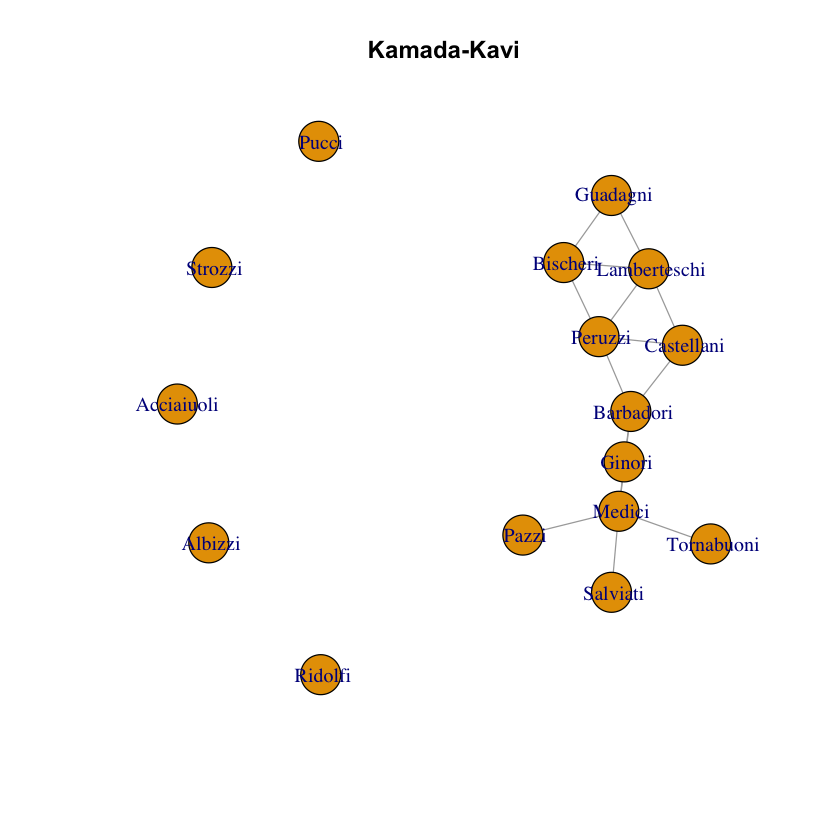

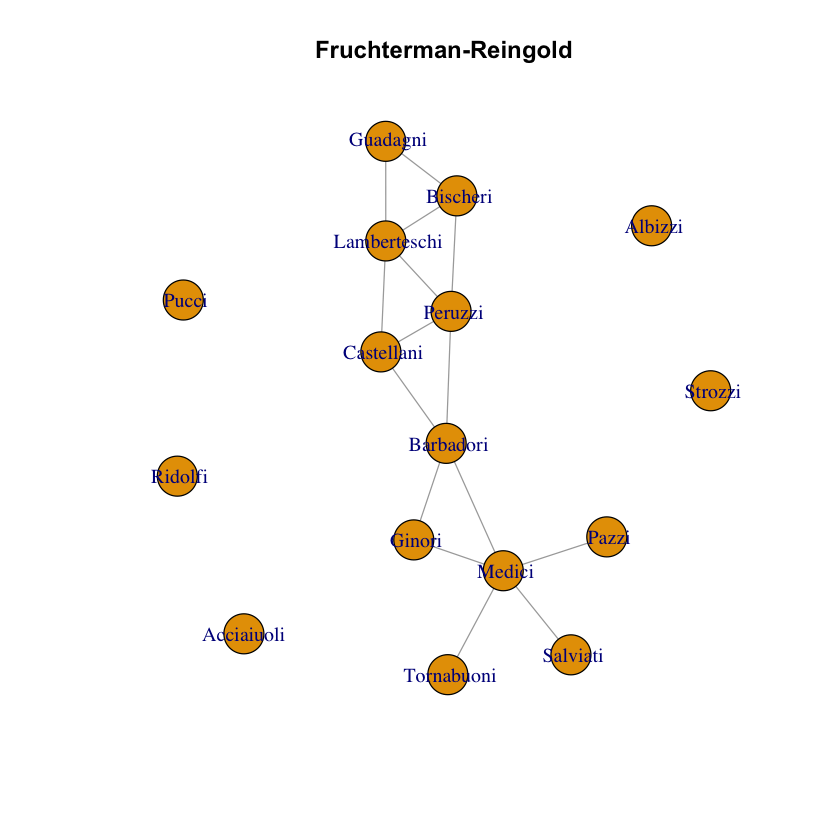

In [7]:
#Алгоритм укладки Камада-Кави
plot(g, edge.arrow.size = 0.6, layout=layout_with_kk, main = "Kamada-Kavi")

#Алгоритм укладки Фрюхтермана– Рейнгольда
plot(g, edge.arrow.size = 0.6, layout=layout.fruchterman.reingold, main = "Fruchterman-Reingold")

### Пункт 6
Вывести «описательную сводку» сети.

In [8]:
summary(matrix, print.adj = FALSE)

   Acciaiuoli     Albizzi    Barbadori      Bischeri        Castellani    
 Min.   :0    Min.   :0   Min.   :0.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0    1st Qu.:0   1st Qu.:0.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0    Median :0   Median :0.00   Median :0.0000   Median :0.0000  
 Mean   :0    Mean   :0   Mean   :0.25   Mean   :0.1875   Mean   :0.1875  
 3rd Qu.:0    3rd Qu.:0   3rd Qu.:0.25   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :0    Max.   :0   Max.   :1.00   Max.   :1.0000   Max.   :1.0000  
     Ginori         Guadagni      Lamberteschi      Medici      
 Min.   :0.000   Min.   :0.000   Min.   :0.00   Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.00   1st Qu.:0.0000  
 Median :0.000   Median :0.000   Median :0.00   Median :0.0000  
 Mean   :0.125   Mean   :0.125   Mean   :0.25   Mean   :0.3125  
 3rd Qu.:0.000   3rd Qu.:0.000   3rd Qu.:0.25   3rd Qu.:1.0000  
 Max.   :1.000   Max.   :1.000   Max.   :1.00   Max.   :1.0000  
      Pazzi         

### Пункт 7
Вычислить «пятичисловую сводку» сети:<br>
    (a) Вычислить размер сети.<br>
    (b) Вычислить плотность сети вручную и с помощью соответствующей функции. Сделать выводы.<br>
    (c) Определить число компонент в сети по графику. Подтвердить свои догадки с помощью соответствующей функции. Сделать выводы.<br>
    (d) Вычислить диаметр сети. Сделать выводы.<br>
    (e) Вычислить коэффициент кластеризации. Сделать выводы.<br>

In [10]:
#Плотность
#Программно
density<-edge_density(g)
cat("Плотность: ",density,"\n")
#Аналог ручного счета
den <- gsize(g)/choose(gorder(g), 2)
cat("Совпали ли значения счета по формуле и при помощи средств языка R? ",density==den,'\n')

#Компоненты
componentsOfNet<-components(g)$no
cat("Компоненты", componentsOfNet, '\n')
#Диаметр
dNetWork<-diameter(g, unconnected = TRUE)

cat("Диаметр",dNetWork,'\n')
#Кластеризация
clasterCoeff<-transitivity(g)
cat("Кластеризация: ", clasterCoeff, '\n')



Плотность:  0.125 
Совпали ли значения счета по формуле и при помощи средств языка R?  TRUE 
Компоненты 6 
Диаметр 5 
Кластеризация:  0.4166667 


### Пункт 8
Вычислить среднюю степень узлов и дисперсию. Сделать выводы.

In [10]:
average<-mean(degree(g))

variance<-var(degree(g))
cat("Средняя степень узлов", average, '\n')
cat("Дисперсия", variance, '\n')

Средняя степень узлов 1.875 
Дисперсия 3.05 


### Пункт 9
Заполнить таблицу для различных мер центральности. Примечание: меры центральности вычислить для неизолированных вершин.
Сделать выводы.

| $n_{i}$      |$C_D^{\prime}(n_i)$     |$C_C^{\prime}(n_i)$|$C_B^{\prime}(n_i)$|$C_I^{\prime}(n_i)$|
|--------------|------------|-----------|------------|------------|
|    Barbadori | 0.40000000 | 0.5882353 | 0.55555556 | 0.12446815 |
|     Bischeri | 0.30000000 | 0.4000000 | 0.05555556 | 0.08898359 |
|   Castellani | 0.30000000 | 0.5000000 | 0.11111111 | 0.10457651 |
|       Ginori | 0.20000000 | 0.4545455 | 0.00000000 | 0.09531249 |
|     Guadagni | 0.20000000 | 0.3125000 | 0.00000000 | 0.07656303 |
| Lamberteschi | 0.40000000 | 0.4166667 | 0.13333333 | 0.09837087 |
|       Medici | 0.50000000 | 0.5263158 | 0.53333333 | 0.11089878 |
|        Pazzi | 0.10000000 | 0.3571429 | 0.00000000 | 0.06388631 |
|      Peruzzi | 0.40000000 | 0.5263158 | 0.30000000 | 0.10916767 |
|     Salviati | 0.10000000 | 0.3571429 | 0.00000000 | 0.06388631 |
|   Tornabuoni | 0.10000000 | 0.3571429 | 0.00000000 | 0.06388631 |

In [11]:
isolatedV<-which(degree(g)==0)
graphWithoutIsolatedV<-delete.vertices(g, isolatedV)
tmpSize<-gorder(graphWithoutIsolatedV)-1
#Центральность по степени
CD<-degree(graphWithoutIsolatedV)/(tmpSize)


#Центральность по близости
CC<-tmpSize*closeness(graphWithoutIsolatedV)


#Центральность по посредничеству
CB<-betweenness(graphWithoutIsolatedV)/choose(tmpSize, 2)


#Центральность по информации
lap<-solve(laplacian_matrix(graphWithoutIsolatedV) + 1)
cii <- diag(lap)
trace <- sum(diag(lap))
row.sum <- 2*colSums(lap)
CI <- 1 / (cii + (trace - row.sum) / (tmpSize+1))
CI <- CI / sum(CI)

frame<-data.frame(CD = CD, CC = CC, CB = CB, CI = CI)
frame

,CD,CC,CB,CI
,<dbl>,<dbl>,<dbl>,<dbl>
Barbadori,0.4,0.5882353,0.55555556,0.12446815
Bischeri,0.3,0.4000000,0.05555556,0.08898359
Castellani,0.3,0.5000000,0.11111111,0.10457651
Ginori,0.2,0.4545455,0.00000000,0.09531249
Guadagni,0.2,0.3125000,0.00000000,0.07656303
Lamberteschi,0.4,0.4166667,0.13333333,0.09837087
Medici,0.5,0.5263158,0.53333333,0.11089878
Pazzi,0.1,0.3571429,0.00000000,0.06388631
Peruzzi,0.4,0.5263158,0.30000000,0.10916767


### Пункт 10
Вычислить значение централизации для каждой меры. Сделать выводы.

In [15]:
#Централизация по степени
cCD<-centralize(CD, tmpSize*(tmpSize-1))

#Централизация по близости
cCC<-centr_clo(graphWithoutIsolatedV)$centralization

#Централизация по посредничеству
cCB<-centr_betw(graphWithoutIsolatedV)$centralization

#Централизация по информации
cCI<-var(CI)

frame<-data.frame(Centr_degree = cCD, Centr_closeness = cCC, Centr_Betweenness = cCB, Cent_Information = cCI)
frame

Centr_degree,Centr_closeness,Centr_Betweenness,Cent_Information
<dbl>,<dbl>,<dbl>,<dbl>
0.02777778,0.3535226,0.4422222,0.000452125


### Пункт 11
Выявить точки сочленения и мосты сети. Подтвердить свои догадки с помощью соответствующих функций (если их нет – реализуйте их самостоятельно). Построить график сети, на котором выделены точки сочленения и мосты.

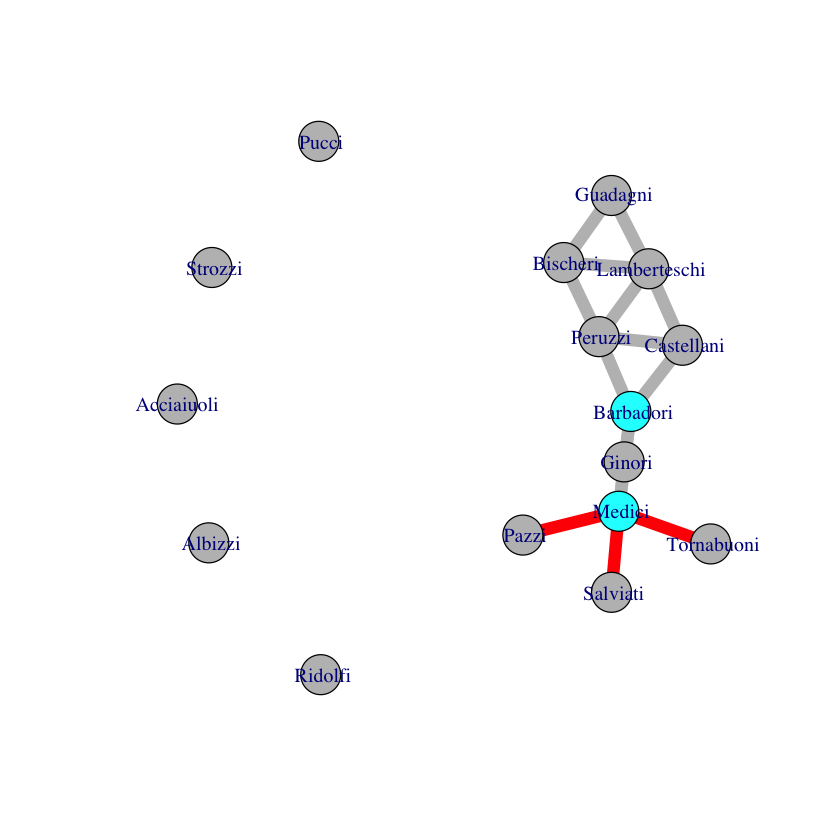

In [16]:
articulationPoints<-articulation_points(g)

graphBridges<-bridges(g)

vertexColors <- ifelse(V(g) %in% articulationPoints,'cyan','gray')
edgeColors <- ifelse(E(g) %in% graphBridges,'red','gray')

plot(g, layout = layout_with_kk, edge.color = edgeColors, vertex.color = vertexColors, edge.width = 10)

### Пункт 12
Выполнить пп.2–8 для направленной сети из файла krackhardt_advice.csv (для нечётных вариантов) и файла krackhardt_friendship.csv (для чётных вариантов).

[1] "Пункт 1: "


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,1,0,1,0,0,0,1,0,0,⋯,0,0,0,0,1,0,1,0,0,1
0,0,0,0,0,1,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,1,1,1,1,1,⋯,1,0,1,0,0,1,1,0,1,1
1,1,0,0,0,1,0,1,0,1,⋯,1,0,0,0,1,1,1,0,1,1
1,1,0,0,0,1,1,1,0,1,⋯,0,1,1,0,1,1,1,1,1,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
0,1,0,0,0,1,0,0,0,0,⋯,1,0,1,0,0,1,1,0,0,1
0,1,0,1,0,1,1,0,0,1,⋯,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,1,1,1,0,1,⋯,1,0,1,0,1,1,1,0,0,1
1,1,1,1,1,0,0,1,0,0,⋯,0,1,0,1,1,1,1,1,1,0


[1] "Пункт 2: "


V1,V2
V1,V4
V1,V8
V1,V16
V1,V18


[1] "Пункт 3: "


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,1,0,1,0,0,0,1,0,0,⋯,0,0,0,0,1,0,1,0,0,1
0,0,0,0,0,1,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,1,1,1,1,1,⋯,1,0,1,0,0,1,1,0,1,1
1,1,0,0,0,1,0,1,0,1,⋯,1,0,0,0,1,1,1,0,1,1
1,1,0,0,0,1,1,1,0,1,⋯,0,1,1,0,1,1,1,1,1,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
0,1,0,0,0,1,0,0,0,0,⋯,1,0,1,0,0,1,1,0,0,1
0,1,0,1,0,1,1,0,0,1,⋯,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,1,1,1,0,1,⋯,1,0,1,0,1,1,1,0,0,1
1,1,1,1,1,0,0,1,0,0,⋯,0,1,0,1,1,1,1,1,1,0


[1] "Пункт 5: "


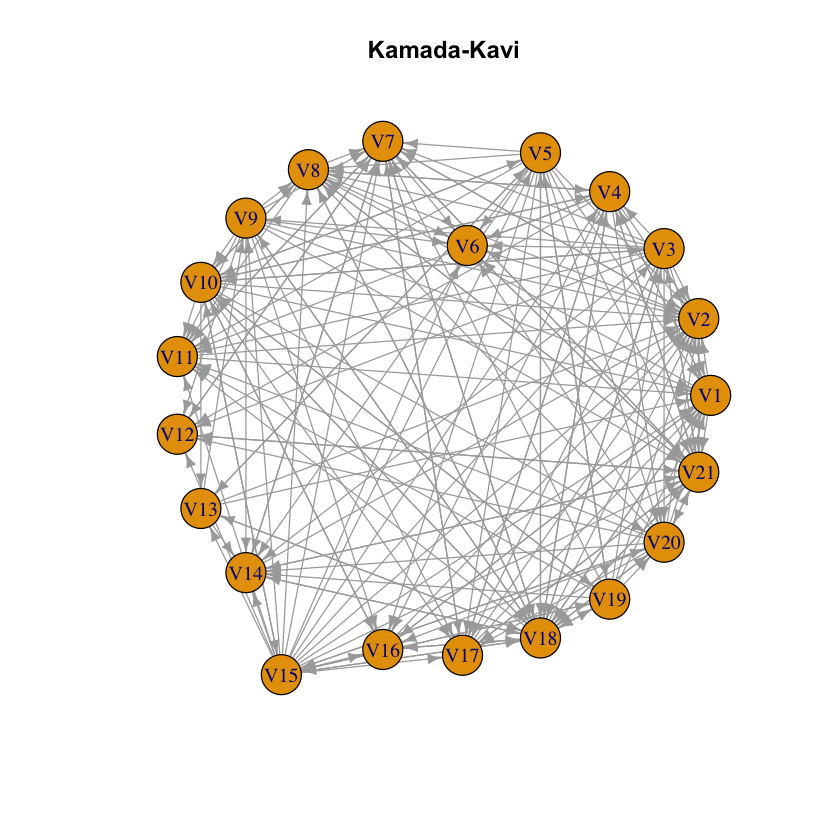

[1] "Пункт 6: "


       V1              V2               V3               V4       
 Min.   :0.000   Min.   :0.0000   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.000   1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.000  
 Median :1.000   Median :1.0000   Median :0.0000   Median :0.000  
 Mean   :0.619   Mean   :0.8571   Mean   :0.2381   Mean   :0.381  
 3rd Qu.:1.000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.000  
 Max.   :1.000   Max.   :1.0000   Max.   :1.0000   Max.   :1.000  
       V5               V6               V7              V8        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :1.000   Median :0.0000  
 Mean   :0.2381   Mean   :0.4762   Mean   :0.619   Mean   :0.4762  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
       V9              V10              V11            

[1] "Пункт 7: "
Плотность:  0.452381 
Совпали ли значения счета по формуле и при помощи средств языка R?  FALSE 
Компоненты 1 
Диаметр 3 
Кластеризация:  0.7345088 
[1] "Пункт 8: "
Средняя степень узлов 18.09524 
 Средняя входящая степень узлов 9.047619 
 Средняя выходящая степень узлов 9.047619 
Дисперсия 32.19048 
 Дисперсия входящих узлов 16.54762 
 Дисперсия выходящих узлов 29.74762 


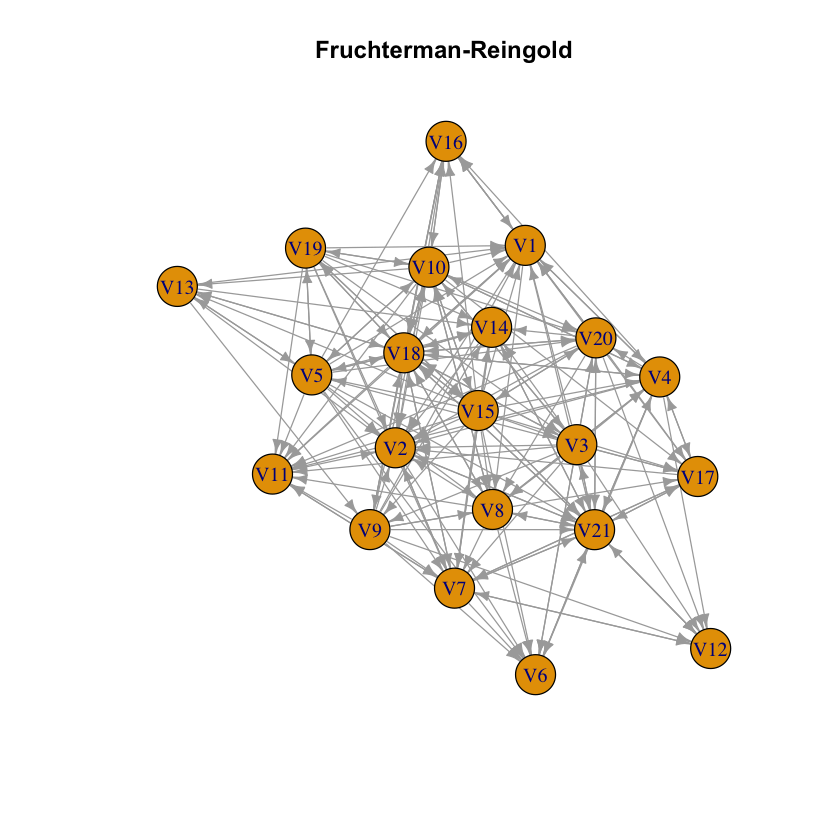

In [11]:
#1
allTable <- read.csv('krackhardt_advice.csv', header = FALSE)
socialMatrix<-allTable

matrix<-data.matrix(socialMatrix)
print("Пункт 1: ")
matrix
#2
g <- graph.adjacency(matrix)
edges_list<-get.edgelist(g)

res<-head(unlist(edges_list), 5)
print("Пункт 2: ")
res

#3
matrix<-data.matrix(socialMatrix)

g <- graph.adjacency(matrix)
edges_list<-get.edgelist(g)
print("Пункт 3: ")
matrix

#4
g <- graph_from_adjacency_matrix(matrix, mode = 'directed')
#Объяснение: передаем в функцию социоматрицу, а так же указываем тип ребер - ненаправленные

#5
print("Пункт 5: ")
#Алгоритм укладки Камада Кави
plot(g, edge.arrow.size = 0.6, layout=layout_with_kk, main = "Kamada-Kavi")

#Алгоритм укладки Фрюхтермана– Рейнгольда
plot(g, edge.arrow.size = 0.6, layout=layout.fruchterman.reingold, main = "Fruchterman-Reingold")

#6
print("Пункт 6: ")
summary(matrix, print.adj = FALSE)
#7

#Плотность
print("Пункт 7: ")
#Программно
density<-edge_density(g)
cat("Плотность: ",density,"\n")
#Аналог ручного счета
den <- (factorial(gorder(g)) / factorial(gorder(g)-2))
cat("Совпали ли значения счета по формуле и при помощи средств языка R? ",density==den,'\n')

#Компоненты
componentsOfNet<-components(g)$no
cat("Компоненты", componentsOfNet, '\n')

#Диаметр
dNetWork<-diameter(g)

cat("Диаметр",dNetWork,'\n')
#Кластеризация
clasterCoeff<-transitivity(g)
cat("Кластеризация: ", clasterCoeff, '\n')

#8
print("Пункт 8: ")
average<-mean(degree(g))
averageIn<-mean(degree(g, mode = 'in'))
averageOut<-mean(degree(g, mode = 'out'))


variance<-var(degree(g))
varianceIn<-var(degree(g, mode = 'in'))
varianceOut<-var(degree(g, mode = 'out'))

cat("Средняя степень узлов", average, '\n', "Средняя входящая степень узлов", averageIn, "\n", "Средняя выходящая степень узлов", averageOut, "\n")
cat("Дисперсия", variance, '\n', "Дисперсия входящих узлов", varianceIn, "\n", "Дисперсия выходящих узлов", varianceOut, "\n")


### Пункт 13
Заполнить таблицу для различных мер престижа:

| $n_i$ | $P_D^{\prime}(n_i)$ | $P_P^{\prime}(n_i)$ |
|-------|---------------------|-----------------|
|    V1 |          0.03250000 |      0.02964860 |
|    V2 |          0.04500000 |      0.03168052 |
|    V3 |          0.01250000 |      0.03161863 |
|    V4 |          0.02000000 |      0.03154961 |
|    V5 |          0.01250000 |      0.03010578 |
|    V6 |          0.02500000 |      0.01820420 |
|    V7 |          0.03250000 |      0.03081633 |
|    V8 |          0.02500000 |      0.03036331 |
|    V9 |          0.01000000 |      0.02558891 |
|   V10 |          0.02250000 |      0.03524719 |
|   V11 |          0.02750000 |      0.02291017 |
|   V12 |          0.01750000 |      0.01506657 |
|   V13 |          0.01000000 |      0.01724693 |
|   V14 |          0.02500000 |      0.02367469 |
|   V15 |          0.01000000 |      0.03584699 |
|   V16 |          0.02000000 |      0.02103545 |
|   V17 |          0.02250000 |      0.02316124 |
|   V18 |          0.03750000 |      0.04761905 |
|   V19 |          0.01000000 |      0.02554676 |
|   V20 |          0.02000000 |      0.03139163 |
|   V21 |          0.03750000 |      0.03844363 |

In [28]:
PD<-degree(g, normalized=TRUE, mode = 'in')/(gorder(g)-1)

PP<-(evcent(g)$vector/gorder(g))

frame<-data.frame( PD = degree(g, normalized=TRUE, mode = 'in')/(gorder(g)-1), PP = (evcent(g)$vector/gorder(g)))
frame

,PD,PP
,<dbl>,<dbl>
V1,0.0325,0.02964860
V2,0.0450,0.03168052
V3,0.0125,0.03161863
V4,0.0200,0.03154961
V5,0.0125,0.03010578
V6,0.0250,0.01820420
V7,0.0325,0.03081633
V8,0.0250,0.03036331
V9,0.0100,0.02558891


## Выводы

Были изучены основные функции для визуализации и анализа сетей, а так же освоено практическое применение библиотеки igraph и языка R для работы с сетью. Сложности возниклы с тем, что бы найти нужную функцию в библиотеке igraph. В работе были рассмотрены два вида графов - полный граф, граф с изолированными вершинами, граф с направленнымии ребрами и граф с ненаправленными ребрами. Была изучена работа функции отрисовки сетей, а так же применены различные алгоритмы силовой укладки сетей.